In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten

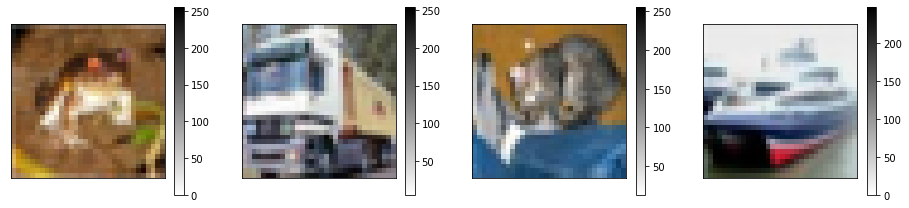

In [2]:
#a)
#A
(trainData, trainLabel), (testData, testLabel) = keras.datasets.cifar10.load_data()
#B, C
assert trainData.shape == (50000, 32, 32, 3)
assert trainLabel.shape == (50000, 1)
assert testData.shape == (10000, 32, 32, 3)
assert testLabel.shape == (10000, 1)

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(20,20))
#D
images = [trainData[0], trainData[1], testData[0], testData[1]]

for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.colorbar()
plt.show()

In [3]:
#b)
#A
model = Sequential()
model.add(Dense(512, input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "valid"))
model.add(Activation("relu"))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "valid"))
model.add(Activation("relu"))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, input_shape = (5, 5, 3)))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 512)       2048      
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        73744     
                                                                 
 activation (Activation)     (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                        

In [4]:
#B
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = "accuracy")

trainData = trainData.astype("float32")
testData = testData.astype("float32")
#norm the images to have the pixel values between 0-1 (instead of 0-255)
trainData /= 255
testData /= 255
#convert the labels to one-hot-encoded variables (see to_categorical)
nb_classes = 10
trainLabel = np_utils.to_categorical(trainLabel, nb_classes)
testLabel = np_utils.to_categorical(testLabel, nb_classes)

model.fit(trainData, trainLabel, batch_size = 64, epochs = 5, verbose = 1)
score = model.evaluate(testData, testLabel)
print(score)

313/313 [==============================] - 16s 50ms/step - loss: 1.4087 - accuracy: 0.4933
[1.408652424812317, 0.4932999908924103]
